In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("rating_final.csv")

In [3]:
dataset

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
datasetAgainstRating = dataset.drop(['rating'],axis = 1)

array([[<AxesSubplot:title={'center':'placeID'}>,
        <AxesSubplot:title={'center':'food_rating'}>],
       [<AxesSubplot:title={'center':'service_rating'}>, <AxesSubplot:>]],
      dtype=object)

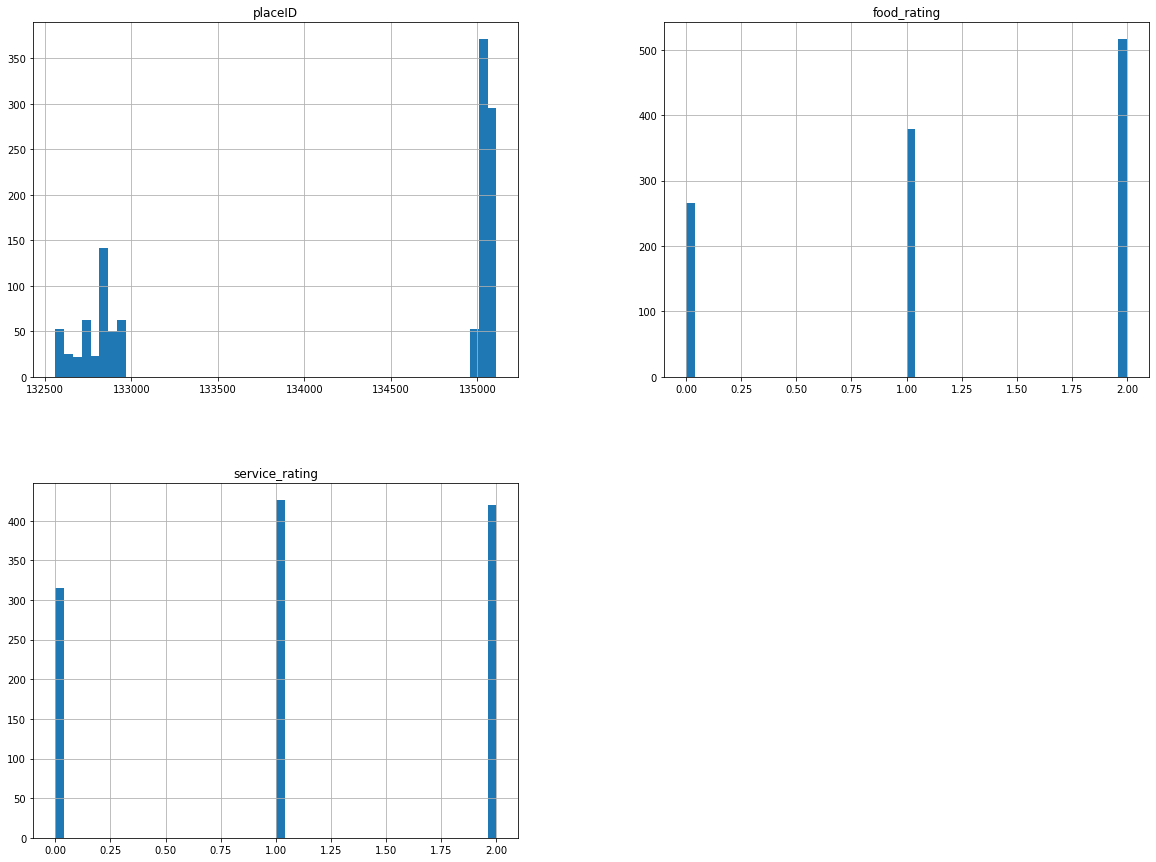

In [6]:
datasetAgainstRating.hist(bins=50, figsize = (20,15))

In [7]:
matrix = dataset.corr()

In [8]:
matrix['rating']

placeID           0.073768
rating            1.000000
food_rating       0.714855
service_rating    0.690757
Name: rating, dtype: float64

In [9]:
dataset.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


In [10]:
dataset = dataset.drop('placeID',axis=1)
dataset = dataset.drop('userID',axis=1)



In [11]:
dataset

,rating,food_rating,service_rating
0,2,2,2
1,2,2,1
2,2,2,2
3,1,2,2
4,1,1,2
...,...,...,...
1156,1,1,1
1157,1,1,0
1158,1,1,0
1159,1,1,1


In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(dataset,test_size = 0.2,random_state = 42)


In [13]:
len(train_set)

928

In [14]:
len(test_set)

233

In [15]:
train_set

,rating,food_rating,service_rating
759,2,2,2
816,1,1,1
862,0,1,0
394,1,2,0
693,2,2,2
...,...,...,...
1044,0,0,0
1095,2,2,2
1130,1,1,0
860,1,1,1


In [16]:
dataset

,rating,food_rating,service_rating
0,2,2,2
1,2,2,1
2,2,2,2
3,1,2,2
4,1,1,2
...,...,...,...
1156,1,1,1
1157,1,1,0
1158,1,1,0
1159,1,1,1


In [17]:
train_set_without_label = train_set.drop("rating",axis = 1)
labels = train_set["rating"].copy()

In [18]:
train_set_without_label

,food_rating,service_rating
759,2,2
816,1,1
862,1,0
394,2,0
693,2,2
...,...,...
1044,0,0
1095,2,2
1130,1,0
860,1,1


In [19]:
labels

759     2
816     1
862     0
394     1
693     2
       ..
1044    0
1095    2
1130    1
860     1
1126    0
Name: rating, Length: 928, dtype: int64

In [20]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy = "median")
imputer.fit(train_set)

SimpleImputer(strategy='median')

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('std_scalar',StandardScaler()),
])

In [22]:
dataset_num_tr = my_pipeline.fit_transform(train_set_without_label)

In [23]:
dataset_num_tr

array([[ 0.99311102,  1.14324695],
       [-0.27457402, -0.10637987],
       [-0.27457402, -1.35600669],
       ...,
       [-0.27457402, -1.35600669],
       [-0.27457402, -0.10637987],
       [-1.54225906, -1.35600669]])

In [24]:
def print_scores(scores):
    print("scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [25]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression()
logisticModel.fit(dataset_num_tr,labels)

LogisticRegression()

In [26]:
from sklearn.metrics import mean_squared_error
rating_predictions = logisticModel.predict(dataset_num_tr)
mse = mean_squared_error(labels,rating_predictions)
rmse = np.sqrt(mse)
print(list(rating_predictions))

[2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 

In [27]:
mse

0.27478448275862066

In [28]:
rmse

0.5241988961821845

In [29]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(dataset_num_tr,labels)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error
rating_predictions = linearModel.predict(dataset_num_tr)
mse = mean_squared_error(labels,rating_predictions)
rmse = np.sqrt(mse)
print(list(rating_predictions))

[1.9227617326970576, 1.0706277982384627, 0.6786481458493558, 1.1388024279188438, 1.9227617326970576, 0.21849386377986768, 1.1388024279188438, 1.9227617326970576, 1.0706277982384627, 1.9227617326970576, 1.9227617326970576, 1.5307820803079508, 1.9227617326970576, 1.9227617326970576, 0.6786481458493558, 1.9227617326970576, 1.9227617326970576, 1.9227617326970576, 0.21849386377986768, 0.6786481458493558, 1.5307820803079508, 0.21849386377986768, 1.0706277982384627, 1.0706277982384627, 1.0706277982384627, 1.0706277982384627, 1.5307820803079508, 1.9227617326970576, 1.5307820803079508, 1.0706277982384627, 1.4626074506275697, 1.5307820803079508, 1.0706277982384627, 0.21849386377986768, 1.9227617326970576, 0.6104735161689746, 1.9227617326970576, 1.4626074506275697, 1.9227617326970576, 0.21849386377986768, 0.21849386377986768, 1.5307820803079508, 1.9227617326970576, 1.0706277982384627, 0.6104735161689746, 1.9227617326970576, 1.0706277982384627, 0.6104735161689746, 0.21849386377986768, 1.9227617326

In [31]:
mse

0.2298770353073072

In [32]:
rmse

0.47945493563765423

In [33]:
X_test = test_set.drop("rating",axis = 1)
Y_test = test_set["rating"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = linearModel.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [34]:
final_rmse

0.5240233101964944

In [35]:
dataset_num_tr[0]

array([0.99311102, 1.14324695])

In [36]:
pre_data = my_pipeline.transform([[5,5]])

In [37]:
pre_data = my_pipeline.transform([[4.3,5]])
linearModel.predict(pre_data)[0]

4.157055538624201

In [38]:
import joblib

In [39]:
joblib.dump(my_pipeline,'pipeline')
joblib.dump(linearModel,'model')

['model']